EV Registration growth




Forecasted EV Registrations (2024 to 2034):
{2023: 67199.5126129827, 2024: 89898.21656105398, 2025: 120264.10648842734, 2026: 160887.0104740843, 2027: 215231.55075183543, 2028: 287932.632364388, 2029: 385190.7422061763, 2030: 515300.7724861681, 2031: 689359.4705936935, 2032: 922211.8519334705, 2033: 1233717.2928285317, 2034: 1650443.2852745047}


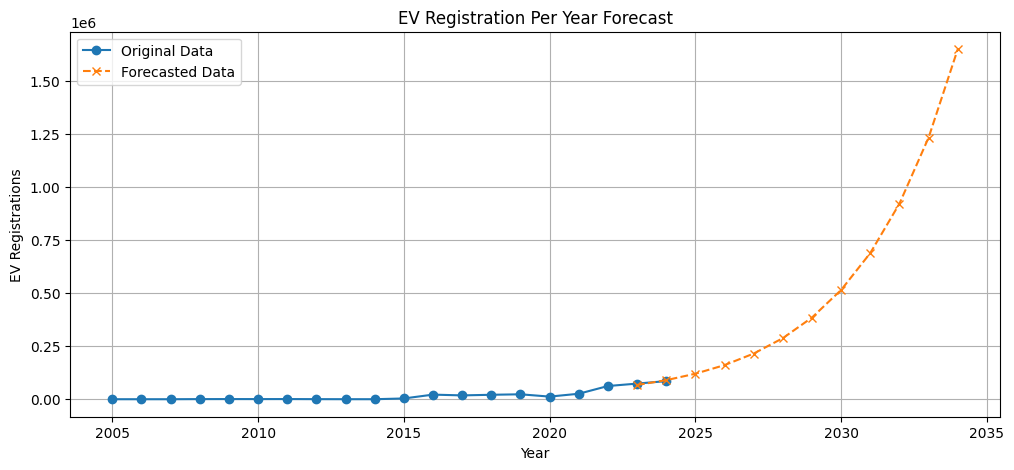

In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
data = {
    2005: 3, 2006: 1, 2007: 1, 2008: 530, 2009: 724, 2010: 614,
    2011: 741, 2012: 369, 2013: 115, 2014: 46, 2015: 3564, 2016: 21686,
    2017: 18042, 2018: 20951, 2019: 23222, 2020: 12377, 2021: 25807,
    2022: 62247, 2023: 73678, 2024: 85380
}

# Converting the data into a pandas Series
ev_registration_counts = pd.Series(data)

# Define exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the dataset, excluding 2024 if we are forecasting beyond it
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Forecast for 2025 to 2030
forecast_years = np.arange(2023, 2023 + 12) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

# Print the forecasted values
print("Forecasted EV Registrations (2024 to 2034):")
print(forecasted_evs)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(filtered_years.index, filtered_years.values, label='Original Data', marker='o')
plt.plot(forecasted_evs.keys(), forecasted_evs.values(), label='Forecasted Data', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('EV Registration Per Year Forecast')
plt.legend()
plt.grid(True)
plt.show()


For 2020 to 2025 prediction

Forecasted EV Registrations (2024 to 2034):
{2023: 66092.7275553022, 2024: 92561.49099867014, 2025: 129630.44396568512, 2026: 181544.74200271972, 2027: 254249.63720373128, 2028: 356071.331535785, 2029: 498670.4977677988, 2030: 698377.6657093572, 2031: 978063.4028780232, 2032: 1369757.4636463942, 2033: 1918316.853175409, 2034: 2686562.8747008513}


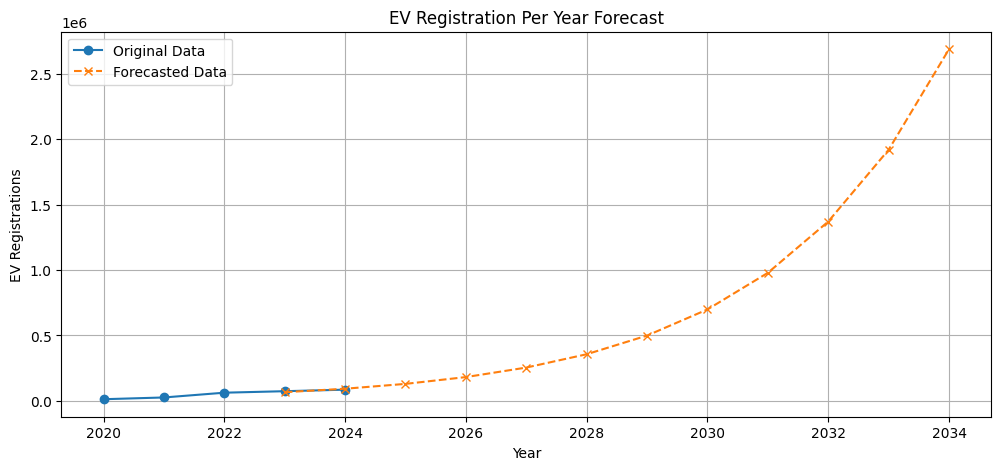

Mean Absolute Error (MAE): 9879.217336637264
Mean Squared Error (MSE): 106905405.69105737
R-squared (R²): 0.8645108302173091


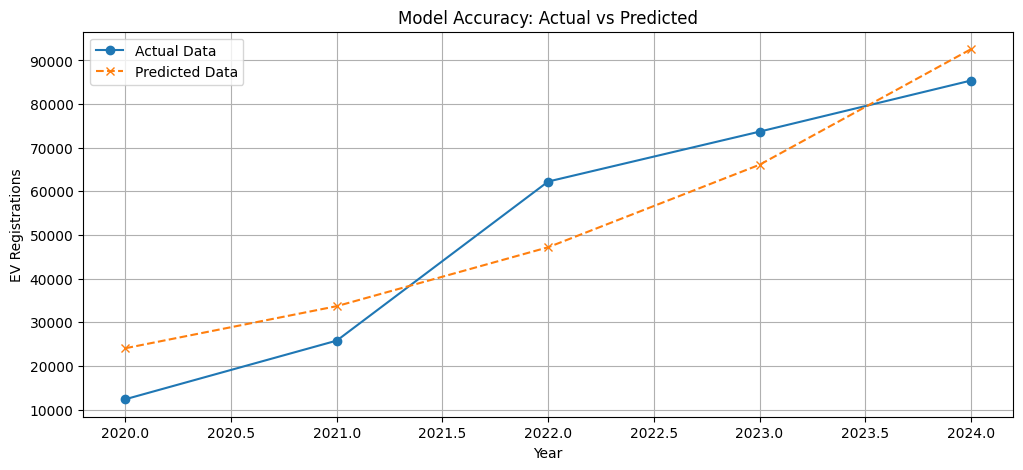

In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
data = {2020: 12377, 2021: 25807,
    2022: 62247, 2023: 73678, 2024: 85380
}

# Converting the data into a pandas Series
ev_registration_counts = pd.Series(data)

# Define exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the dataset, excluding 2024 if we are forecasting beyond it
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Forecast for 2025 to 2030
forecast_years = np.arange(2023, 2023 + 12) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

# Print the forecasted values
print("Forecasted EV Registrations (2024 to 2034):")
print(forecasted_evs)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(filtered_years.index, filtered_years.values, label='Original Data', marker='o')
plt.plot(forecasted_evs.keys(), forecasted_evs.values(), label='Forecasted Data', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('EV Registration Per Year Forecast')
plt.legend()
plt.grid(True)
plt.show()




To find the accuracy of predicted model excluding the diifrent ecomnomic and social factors


Mean Absolute Error (MAE): 4768.688129388344
Mean Squared Error (MSE): 44235327.900234
R-squared (R²): 0.9323216743151274


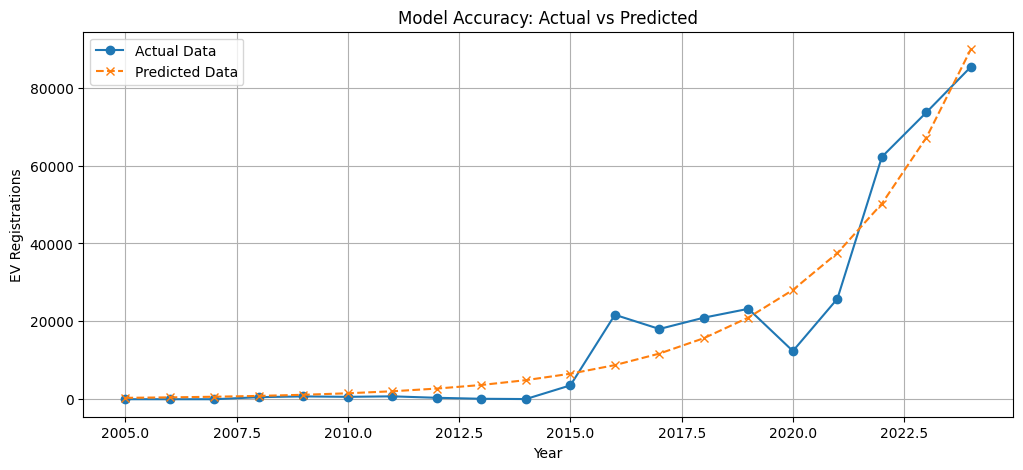

In [3]:
 # Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare training data (up to 2022 for training)
train_years = ev_registration_counts[ev_registration_counts.index < 2034]
x_train = train_years.index - train_years.index.min()
y_train = train_years.values

# Fit the model to the training data
params, covariance = curve_fit(exp_growth, x_train, y_train)

# Predict for the years in the dataset
x_test = ev_registration_counts.index - ev_registration_counts.index.min()
y_test = ev_registration_counts.values
y_pred = exp_growth(x_test, *params)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
plt.figure(figsize=(12, 5))
plt.plot(ev_registration_counts.index, y_test, label="Actual Data", marker='o')
plt.plot(ev_registration_counts.index, y_pred, label="Predicted Data", linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('Model Accuracy: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


Forecasted EV Registrations (2025 to 2034):
2025: 679307.84
2026: 698709.18
2027: 718664.63
2028: 739190.01
2029: 760301.61
2030: 782016.16
2031: 804350.89
2032: 827323.51
2033: 850952.24
2034: 875255.82


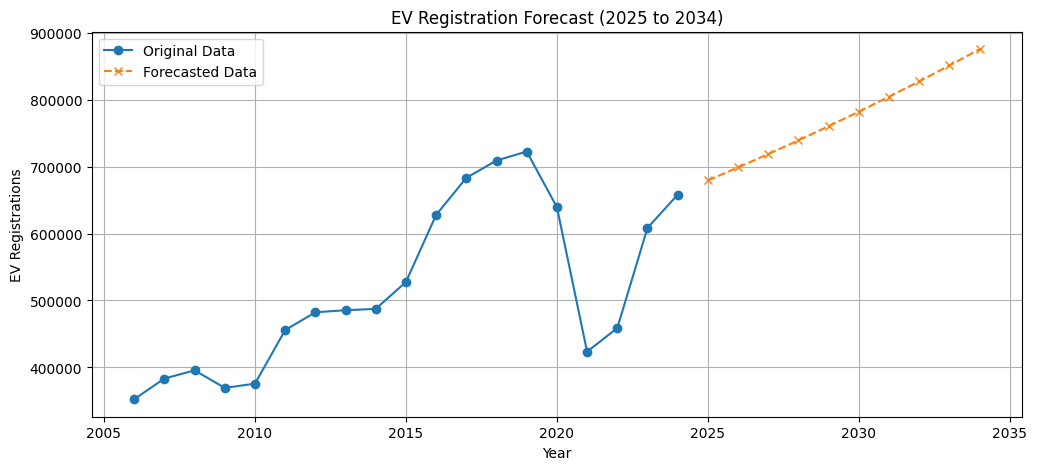

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided
data = {
    2006: 352558, 2007: 383447, 2008: 395670, 2009: 369496, 2010: 375795, 2011: 455787,
    2012: 482406, 2013: 485491, 2014: 487434, 2015: 527643, 2016: 627865, 2017: 683186,
    2018: 709062, 2019: 722411, 2020: 639451, 2021: 423515, 2022: 458910, 2023: 608388,
    2024: 657988
}

# Converting the data into a pandas Series
ev_registration_counts = pd.Series(data)

# Define exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the dataset, excluding 2024 if we are forecasting beyond it
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Forecast for 2025 to 2034
forecast_years = np.arange(2025, 2035)
forecast_years_adjusted = forecast_years - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years_adjusted, *params)

# Create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years, forecasted_values))

# Print the forecasted values
print("Forecasted EV Registrations (2025 to 2034):")
for year, value in forecasted_evs.items():
    print(f"{year}: {value:.2f}")

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(filtered_years.index, filtered_years.values, label='Original Data', marker='o')
plt.plot(forecasted_evs.keys(), forecasted_evs.values(), label='Forecasted Data', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('EV Registration Forecast (2025 to 2034)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-14-b31ef3ccedc5>:33: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(y)


ValueError: Input y contains infinity or a value too large for dtype('float64').

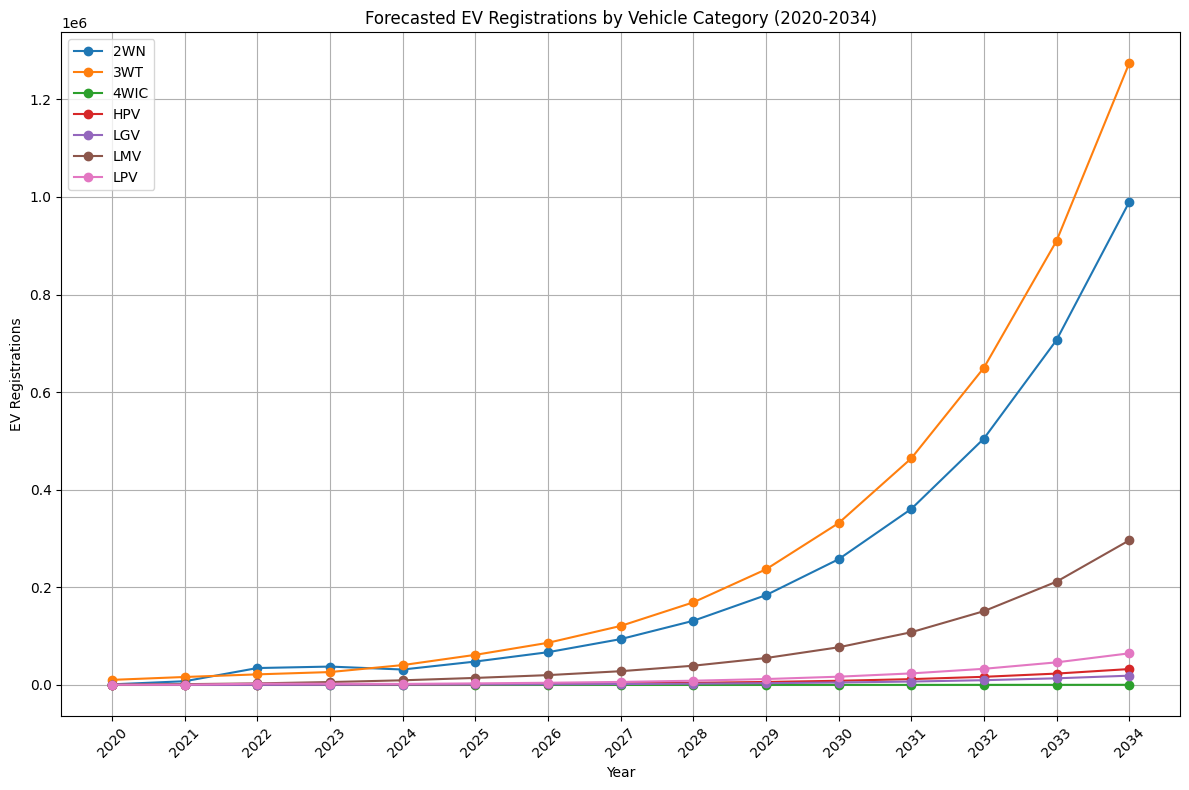

In [6]:
import matplotlib.pyplot as plt

# Data
years = list(range(2020, 2035))
data = {
    '2WN': [1164, 7557, 34573, 37573, 31536, 47879, 67032, 93846, 131386, 183943, 257524, 360539, 504761, 706676, 989361],
    '3WT': [10328, 16248, 21621, 26343, 40601, 61642, 86300, 120822, 169153, 236817, 331549, 464175, 649855, 909810, 1273752],
    '4WIC': [0, 0, 1, 3, 6, 9, 13, 18, 25, 35, 49, 69, 96, 134, 188],
    'HPV': [0, 30, 399, 1121, 1036, 1573, 2202, 3083, 4316, 6043, 8460, 11844, 16582, 23215, 32502],
    'LGV': [0, 19, 6, 322, 603, 915, 1282, 1794, 2512, 3517, 4924, 6894, 9652, 13512, 18918],
    'LMV': [443, 1531, 3133, 5859, 9441, 14334, 20067, 28095, 39333, 55067, 77095, 107935, 151112, 211559, 296187],
    'LPV': [442, 425, 2515, 2452, 2062, 3131, 4383, 6136, 8591, 12027, 16838, 23574, 33004, 46206, 64690]
}

# Plotting each vehicle category's growth
plt.figure(figsize=(12, 8))

for category, values in data.items():
    plt.plot(years, values, label=category, marker='o')

plt.xlabel('Year')
plt.ylabel('EV Registrations')
plt.title('Forecasted EV Registrations by Vehicle Category (2020-2034)')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

plt.show()


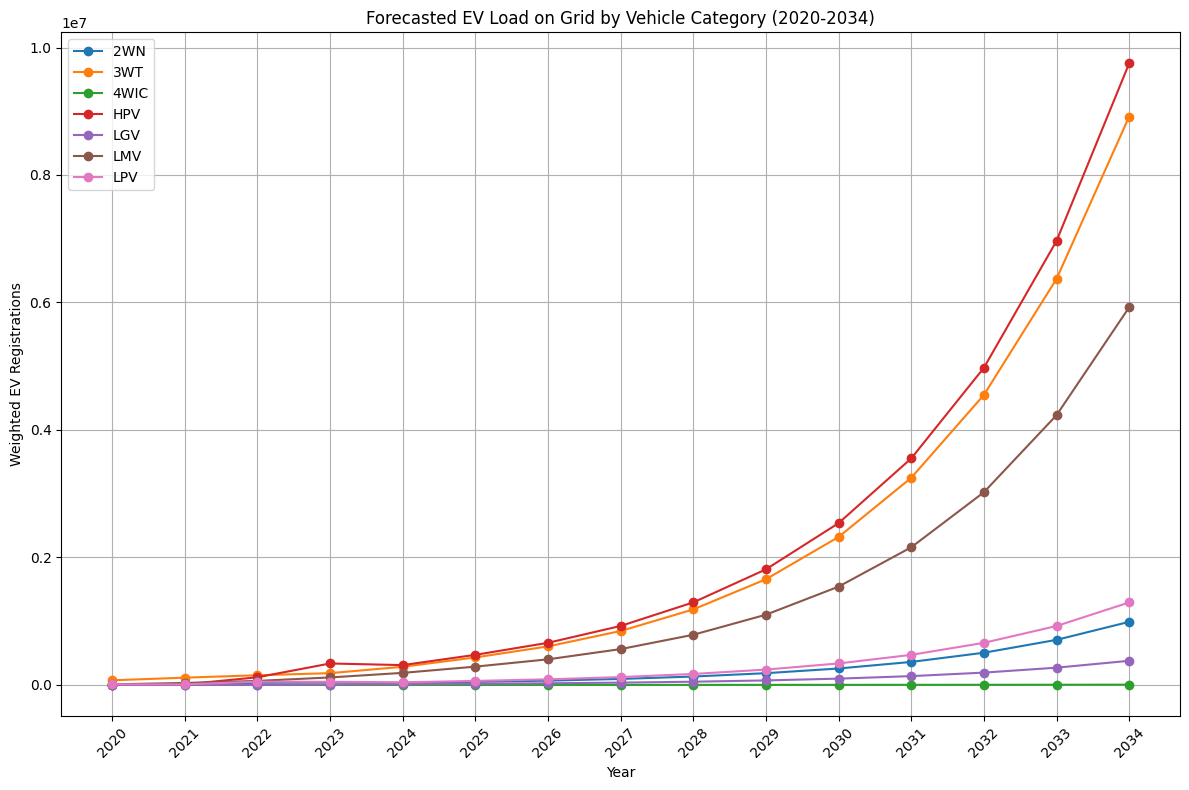

In [10]:
import matplotlib.pyplot as plt

# Data
years = list(range(2020, 2035))
data = {
    '2WN': [1164, 7557, 34573, 37573, 31536, 47879, 67032, 93846, 131386, 183943, 257524, 360539, 504761, 706676, 989361],
    '3WT': [10328, 16248, 21621, 26343, 40601, 61642, 86300, 120822, 169153, 236817, 331549, 464175, 649855, 909810, 1273752],
    '4WIC': [0, 0, 1, 3, 6, 9, 13, 18, 25, 35, 49, 69, 96, 134, 188],
    'HPV': [0, 30, 399, 1121, 1036, 1573, 2202, 3083, 4316, 6043, 8460, 11844, 16582, 23215, 32502],
    'LGV': [0, 19, 6, 322, 603, 915, 1282, 1794, 2512, 3517, 4924, 6894, 9652, 13512, 18918],
    'LMV': [443, 1531, 3133, 5859, 9441, 14334, 20067, 28095, 39333, 55067, 77095, 107935, 151112, 211559, 296187],
    'LPV': [442, 425, 2515, 2452, 2062, 3131, 4383, 6136, 8591, 12027, 16838, 23574, 33004, 46206, 64690]
}

# Weights for each category
weights = {
    '2WN': 1,
    '3WT': 7,
    '4WIC': 20,
    'HPV': 300,
    'LGV': 20,
    'LMV': 20,
    'LPV': 20
}

# Calculate weighted values for each category
weighted_data = {category: [value * weights[category] for value in values] for category, values in data.items()}

# Plotting weighted values
plt.figure(figsize=(12, 8))

for category, values in weighted_data.items():
    plt.plot(years, values, label=category, marker='o')

plt.xlabel('Year')
plt.ylabel('Weighted EV Registrations')
plt.title('Forecasted EV Load on Grid by Vehicle Category (2020-2034)')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

plt.show()


Income level rise in delhi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define the data
data = {
    "Year": [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    "Per Capita Income Level (Median ₹)": [69128, 76243, 83243, 91845, 98262, 105195, 185001, 192220, 200702, 213669, 233115, 244255, 252960, 257597, 260559, 228162, 244024, 258941, 273687, None, None],
    "Population": [18691000, 19309000, 19946000, 20606000, 21285000, 21988000, 22714000, 23464000, 24239000, 25039000, 25866000, 26720000, 27602000, 28514000, 29399000, 30291000, 31181000, 32066000, 32941000, 33807000, 34666000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Preprocess: Handle missing values by filling with the mean for Per Capita Income Level (Median ₹)
df['Per Capita Income Level (Median ₹)'].fillna(df['Per Capita Income Level (Median ₹)'].mean(), inplace=True)

# Prepare the data for regression
X = df['Population'].values.reshape(-1, 1)  # Population as independent variable
y = df['Per Capita Income Level (Median ₹)'].values  # Per capita income as dependent variable

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_pred = linear_model.predict(X)

# Predict for future population (2024-2030)
future_population = np.array([33807000, 34666000, 35520000, 36377000, 37237000, 38100000, 38966000]).reshape(-1, 1)

linear_future = linear_model.predict(future_population)


# Results
linear_results = pd.DataFrame({
    "Year": range(2024, 2031),
    "Predicted Per Capita Income (Linear)": np.round(linear_future, 2)
})


# Display results
linear_results


<ipython-input-45-d1b8b4b87272>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Per Capita Income Level (Median ₹)'].fillna(df['Per Capita Income Level (Median ₹)'].mean(), inplace=True)


,Year,Predicted Per Capita Income (Linear)
0,2024,270156.89
1,2025,279461.01
2,2026,288710.98
3,2027,297993.44
4,2028,307308.39
5,2029,316655.84
6,2030,326035.78


Populaton Increase prediction


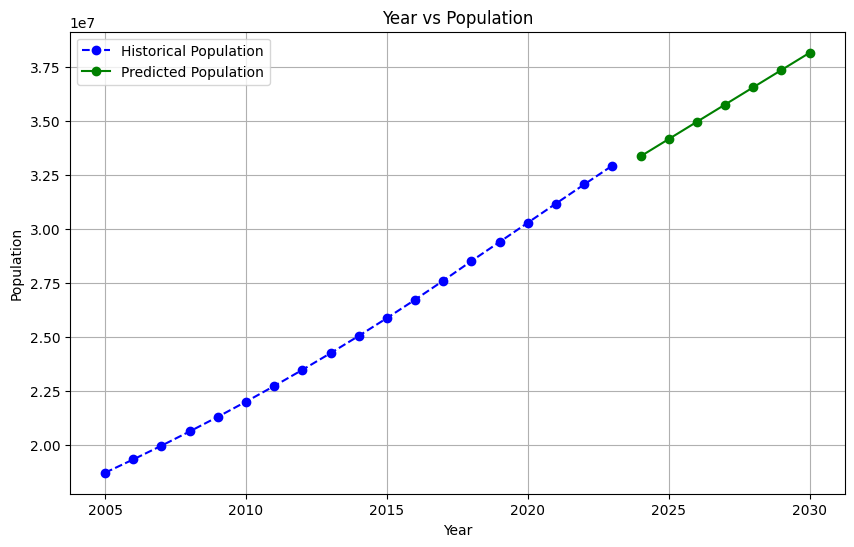

   Year  Predicted Population
0  2024              33370544
1  2025              34171488
2  2026              34972432
3  2027              35773375
4  2028              36574319
5  2029              37375263
6  2030              38176207


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define the data
data = {
    "Year": [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Per Capita Income Level (Median ₹)": [69128, 76243, 83243, 91845, 98262, 105195, 185001, 192220, 200702, 213669, 233115, 244255, 252960, 257597, 260559, 228162, 244024, 258941, 273687],
    "Population": [18691000, 19309000, 19946000, 20606000, 21285000, 21988000, 22714000, 23464000, 24239000, 25039000, 25866000, 26720000, 27602000, 28514000, 29399000, 30291000, 31181000, 32066000, 32941000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the data for regression
X = df['Population'].values.reshape(-1, 1)  # Population as independent variable
y = df['Per Capita Income Level (Median ₹)'].values  # Per capita income as dependent variable

# Prepare the data for population prediction
X_population = df['Year'].values.reshape(-1, 1)  # Year as independent variable
y_population = df['Population'].values  # Population as dependent variable

# Linear Regression Model for Population Growth
linear_model_population = LinearRegression()
linear_model_population.fit(X_population, y_population)

# Predict population for future years (2024-2030)
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
predicted_population = linear_model_population.predict(future_years)

# Calculate change in population
population_change = np.diff(np.insert(predicted_population, 0, df['Population'].iloc[-1]))

# Combine predictions
predictions = pd.DataFrame({
    "Year": range(2024, 2031),
    "Predicted Population": np.round(predicted_population).astype(int),


    })
# Plotting Year vs Population
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], label="Historical Population", marker='o', linestyle='--', color='blue')
plt.plot(predictions['Year'], predictions['Predicted Population'], label="Predicted Population", marker='o', color='green')
plt.title("Year vs Population")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()


# Display predictions
print(predictions)


In [ ]:
!pip install meteostat

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


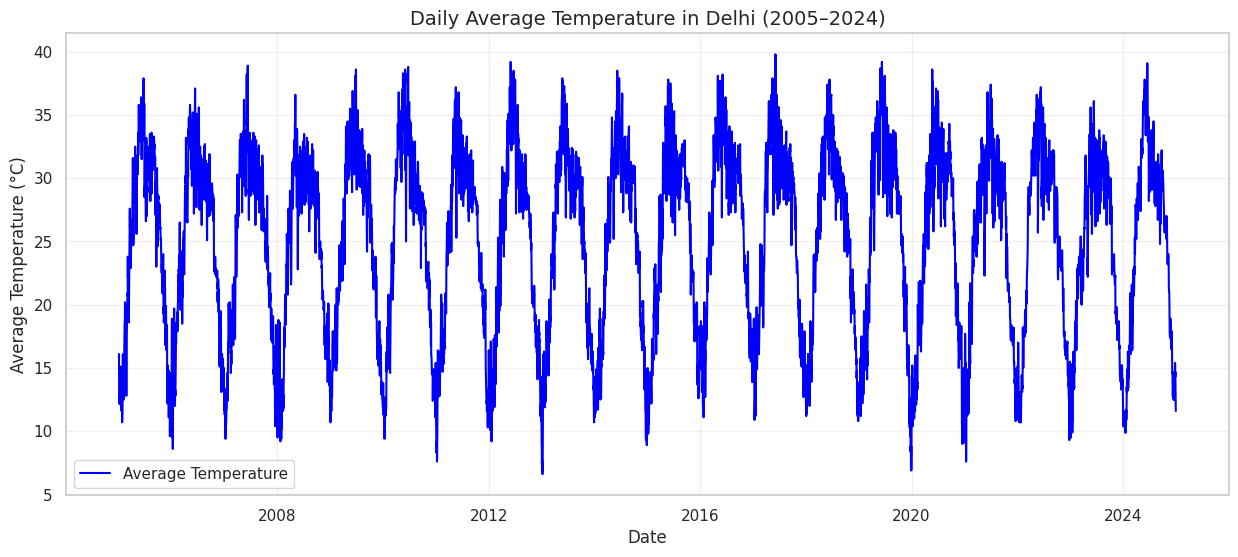

In [ ]:
from datetime import datetime
from meteostat import Point, Daily
import pandas as pd
import matplotlib.pyplot as plt

# Define location for Delhi (latitude, longitude)
delhi = Point(28.6139, 77.2090)

# Convert date strings to datetime objects
start = datetime(2005, 1, 1)
end = datetime(2024, 12, 31)

# Fetch daily weather data for Delhi
data = Daily(delhi, start, end)
data = data.fetch()

# Reset index for easier display
data.reset_index(inplace=True)

# Select only date and average temperature (tavg)
data_filtered = data[['time', 'tavg']]

# Drop rows with missing temperature data
data_filtered.dropna(inplace=True)

# Plot the graph
plt.figure(figsize=(15, 6))
plt.plot(data_filtered['time'], data_filtered['tavg'], label='Average Temperature', color='blue')
plt.title('Daily Average Temperature in Delhi (2005–2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


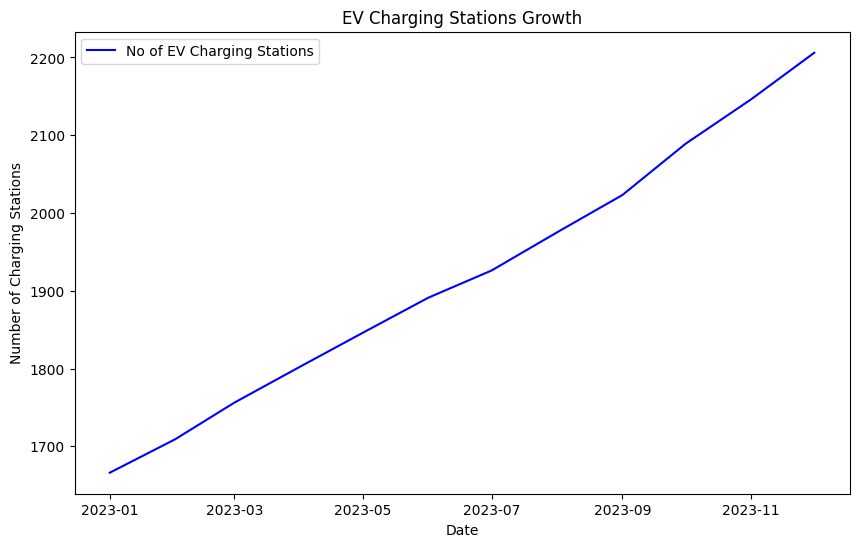

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                Month  Predicted EV Charging Stations
2024-01-01 2023-12-31                     2264.786342
2024-02-01 2024-01-31                     2323.302681
2024-03-01 2024-02-29                     2381.550254
2024-04-01 2024-03-31                     2439.530298
2024-05-01 2024-04-30                     2497.244041
2024-06-01 2024-05-31                     2554.692707
2024-07-01 2024-06-30                     2611.877511
2024-08-01 2024-07-31                     2668.799667
2024-09-01 2024-08-31                     2725.460381
2024-10-01 2024-09-30                     2781.860854


<ipython-input-18-a46c53cea5f3>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(df.index[-1] + pd.Timedelta(days=30), periods=forecast_steps, freq='M')


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Monthly data
data = {
    "Month": ["Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23", "Dec 23"],
    "No_of_EV_Charging_Stations": [1666, 1709, 1756, 1802, 1846, 1891, 1926, 1975, 2023, 2089, 2146, 2206]
}

df = pd.DataFrame(data)

# Convert the 'Month' to a datetime object for time-based analysis
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(df['No_of_EV_Charging_Stations'], label='No of EV Charging Stations', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Charging Stations')
plt.title('EV Charging Stations Growth')
plt.legend()
plt.show()

# Train the ARIMA model
model = ARIMA(df['No_of_EV_Charging_Stations'], order=(1, 1, 1))  # ARIMA(p,d,q) model
model_fit = model.fit()

# Forecast the next 10 months (for example, Jan 24 - Oct 24)
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Display the forecasted values
forecast_months = pd.date_range(df.index[-1] + pd.Timedelta(days=30), periods=forecast_steps, freq='M')

# Show forecasted values with months
forecast_df = pd.DataFrame({
    "Month": forecast_months,
    "Predicted EV Charging Stations": forecast
})

print(forecast_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Historical data with year and month information
data = {
    'Year': [2024, 2024, 2024, 2024, 2024, 2024, 2025, 2024, 2024, 2024],
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
    'EV_Charging_Station': [5.65, 5.57, 4.81, 5.63, 5.78, 6.24, 6.52, 6.84, 5.40, 5.11],
    'Heavy_Duty_PCS': [2.56, 2.52, 2.69, 3.12, 3.73, 4.66, 4.76, 4.85, 5.61, 5.77],
    'Total_Consumption': [8.220, 8.105, 7.501, 8.760, 9.520, 10.900, 11.280, 11.690, 11.010, 10.880]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Adding month number to capture trends
df['Month_Num'] = np.arange(1, len(df) + 1)

# Projected EV and Bus data for future years (example: linear growth assumed)
ev_projection = np.array([120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000])  # Example data
bus_projection = np.array([8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000])  # Example data

df['EV_Projection'] = ev_projection
df['Bus_Projection'] = bus_projection

# Features and target variables for model training
X = df[['Year', 'Month_Num', 'EV_Projection', 'Bus_Projection']]
y = df[['EV_Charging_Station', 'Heavy_Duty_PCS', 'Total_Consumption']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Predict future consumption (next year projections)
future_months = np.array([11, 12, 13, 14, 15])  # Example future months (Nov 24, Dec 24, etc.)
future_years = np.array([2024, 2024, 2024, 2025, 2025])  # Example years for future data
future_ev_projection = np.array([120000, 120000, 120000, 120000, 120000])
future_bus_projection = np.array([8000, 8000, 8000, 8000, 8000])

future_data = pd.DataFrame({
    'Year': future_years,
    'Month_Num': future_months,
    'EV_Projection': future_ev_projection,
    'Bus_Projection': future_bus_projection
})

future_predictions = model.predict(future_data)

print("Future Consumption Predictions (Year, Month, EV Charging Station, Heavy Duty PCS, Total Consumption):")
future_results = pd.DataFrame(future_predictions, columns=['EV_Charging_Station', 'Heavy_Duty_PCS', 'Total_Consumption'])
future_results['Year'] = future_years
future_results['Month'] = future_months

print(future_results)


Mean Squared Error:  1.6210509873717591
Future Consumption Predictions (Year, Month, EV Charging Station, Heavy Duty PCS, Total Consumption):
   EV_Charging_Station  Heavy_Duty_PCS  Total_Consumption  Year  Month
0             7.152131        6.121148          13.268525  2024     11
1             7.350984        6.511107          13.855684  2024     12
2             7.549836        6.901066          14.442844  2024     13
3             7.911967        7.489713          15.390119  2025     14
4             8.110820        7.879672          15.977279  2025     15


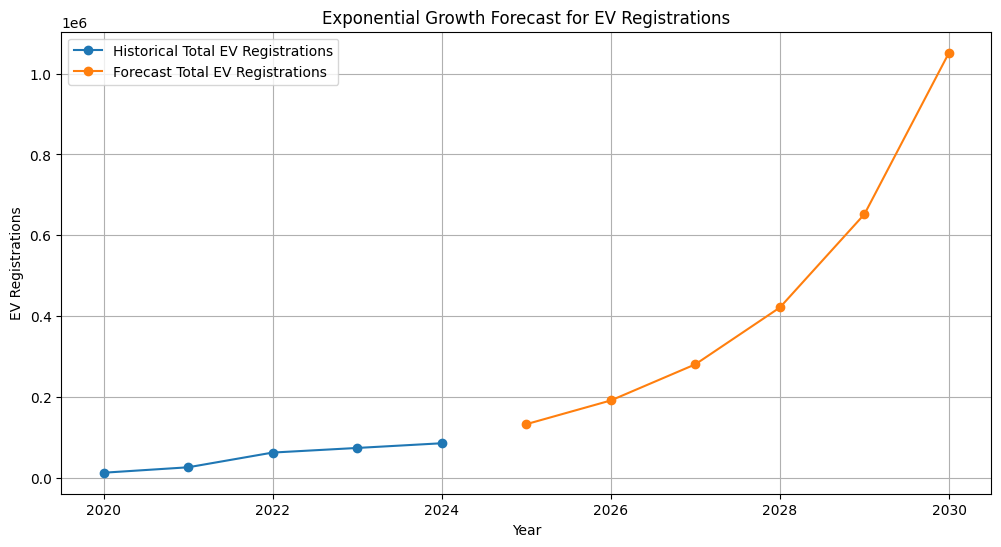

Forecasted Data:
   Year  2WIC            2WN  2WT  3WIC  3WN            3WT         4WIC  HGV  \
0  2025     0   53557.676616    0     0    0   54824.921683    14.377706    0   
1  2026     0   73103.484427    0     0    0   75779.193965    33.831701    0   
2  2027     0   99782.510612    0     0    0  104742.260669    79.608248    0   
3  2028     0  136198.014392    0     0    0  144775.110369   187.323516    0   
4  2029     0  185903.311217    0     0    0  200108.651928   440.784728    0   
5  2030     0  253748.494614    0     0    0  276590.862023  1037.195862    0   

   HMV           HPV            LGV            LMV           LPV  MGV  MMV  \
0    0   2010.413736    1588.370117   17134.039326   3347.803805    0    0   
1    0   3367.911972    4072.306237   30474.502799   4376.015829    0    0   
2    0   5642.038178   10440.688802   54201.773626   5720.022931    0    0   
3    0   9451.730053   26768.120153   96402.959667   7476.815353    0    0   
4    0  15833.852621   68

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data preparation
data = {
    "Year": [2020, 2021, 2022, 2023, 2024],
    "Total": [12377, 25811, 62248, 73673, 85285],
    "2WIC": [0, 0, 0, 0, 0],
    "2WN": [1164, 7557, 34573, 37573, 31536],
    "2WT": [0, 0, 0, 0, 0],
    "3WIC": [0, 0, 0, 0, 0],
    "3WN": [0, 0, 0, 0, 0],
    "3WT": [10328, 16248, 21621, 26343, 40601],
    "4WIC": [0, 0, 1, 3, 6],
    "HGV": [0, 0, 0, 0, 0],
    "HMV": [0, 0, 0, 0, 0],
    "HPV": [0, 30, 399, 1121, 1036],
    "LGV": [0, 19, 6, 322, 603],
    "LMV": [443, 1531, 3133, 5859, 9441],
    "LPV": [442, 425, 2515, 2452, 2062],
    "MGV": [0, 0, 0, 0, 0],
    "MMV": [0, 0, 0, 0, 0],
    "MPV": [0, 1, 0, 0, 0],
    "OTH": [0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Define exponential growth function
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Forecast each category
categories = [col for col in df.columns if col not in ["Year", "Total"]]
forecast_data = {}

x_years = np.array(df["Year"] - df["Year"].min())  # Normalize years for better fitting
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])
x_future = future_years - df["Year"].min()

for category in categories:
    y_category = np.array(df[category])
    if y_category.sum() > 0:  # Only fit if there's non-zero data
        params, _ = curve_fit(exponential_growth, x_years, y_category, p0=[1, 0.1])
        forecast_data[category] = exponential_growth(x_future, *params)
    else:
        forecast_data[category] = [0] * len(future_years)

# Calculate the total from the sum of the individual category forecasts
forecast_df = pd.DataFrame({
    "Year": future_years
})

# Add individual category forecasts
for category, prediction in forecast_data.items():
    forecast_df[category] = prediction

# Add the total forecast (sum of individual category forecasts)
forecast_df["Total_Forecast"] = forecast_df[categories].sum(axis=1)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Total"], label="Historical Total EV Registrations", marker='o')
plt.plot(future_years, forecast_df["Total_Forecast"], label="Forecast Total EV Registrations", marker='o')
plt.xlabel("Year")
plt.ylabel("EV Registrations")
plt.title("Exponential Growth Forecast for EV Registrations")
plt.legend()
plt.grid()
plt.show()

print("Forecasted Data:")
print(forecast_df)


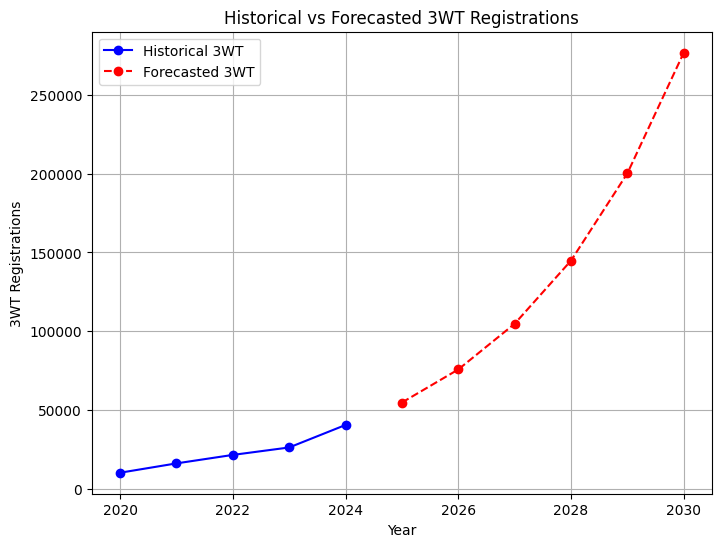

Forecasted 3WT values: [ 54824.92168271  75779.19396526 104742.26066859 144775.11036863
 200108.65192767 276590.86202283]


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extract the data for 3WT
y_3wt = np.array(df["3WT"])
x_years = np.array(df["Year"] - df["Year"].min())  # Normalize years

# Define exponential growth function
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential growth curve for 3WT
params_3wt, _ = curve_fit(exponential_growth, x_years, y_3wt, p0=[1, 0.1])

# Predict for future years
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])
x_future = future_years - df["Year"].min()
forecast_3wt = exponential_growth(x_future, *params_3wt)

# Plot the results for 3WT
plt.figure(figsize=(8, 6))
plt.plot(df["Year"], y_3wt, label="Historical 3WT", marker='o', color='blue')
plt.plot(future_years, forecast_3wt, label="Forecasted 3WT", marker='o', linestyle='--', color='red')
plt.xlabel("Year")
plt.ylabel("3WT Registrations")
plt.title("Historical vs Forecasted 3WT Registrations")
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values for 3WT
print("Forecasted 3WT values:", forecast_3wt)


For category growth



Forecasted EV Registrations for 2WN (2025-2034):
Year 2025: 47879 EV Registrations
Year 2026: 67032 EV Registrations
Year 2027: 93846 EV Registrations
Year 2028: 131386 EV Registrations
Year 2029: 183943 EV Registrations
Year 2030: 257524 EV Registrations
Year 2031: 360539 EV Registrations
Year 2032: 504761 EV Registrations
Year 2033: 706676 EV Registrations
Year 2034: 989361 EV Registrations

Forecasted EV Registrations for 3WT (2025-2034):
Year 2025: 61642 EV Registrations
Year 2026: 86300 EV Registrations
Year 2027: 120822 EV Registrations
Year 2028: 169153 EV Registrations
Year 2029: 236817 EV Registrations
Year 2030: 331549 EV Registrations
Year 2031: 464175 EV Registrations
Year 2032: 649855 EV Registrations
Year 2033: 909810 EV Registrations
Year 2034: 1273752 EV Registrations

Forecasted EV Registrations for 4WIC (2025-2034):
Year 2025: 9 EV Registrations
Year 2026: 13 EV Registrations
Year 2027: 18 EV Registrations
Year 2028: 25 EV Registrations
Year 2029: 35 EV Registrations

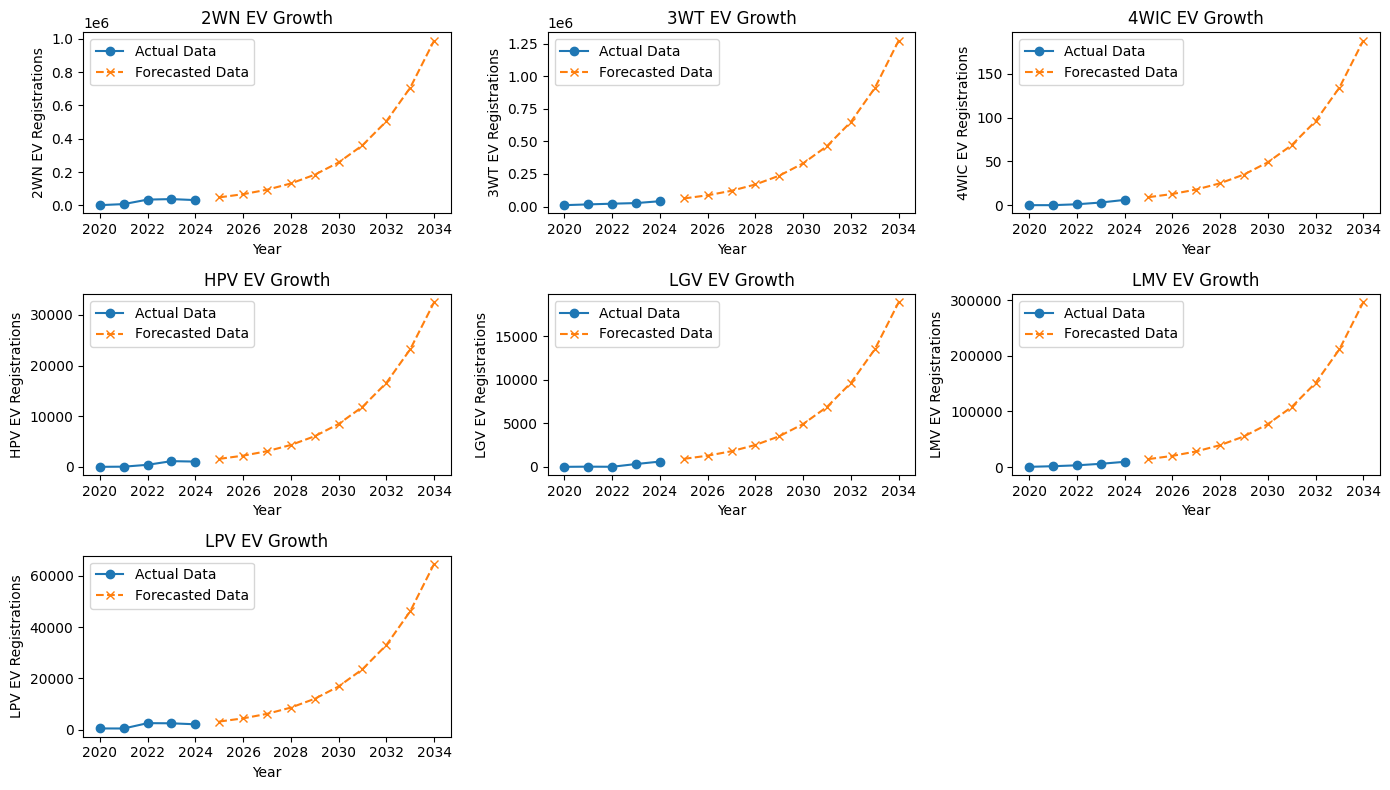

In [21]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Provided data
data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    '2WN': [1164, 7557, 34573, 37573, 31536],
    '3WT': [10328, 16248, 21621, 26343, 40601],
    '4WIC': [0, 0, 1, 3, 6],
    'HPV': [0, 30, 399, 1121, 1036],
    'LGV': [0, 19, 6, 322, 603],
    'LMV': [443, 1531, 3133, 5859, 9441],
    'LPV': [442, 425, 2515, 2452, 2062],
    'Total': [12377, 25811, 62248, 73673, 85285]
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the dataset (excluding future years for now)
years = df['Year'].values
categories = df.columns[1:-1]  # Excluding the 'Year' and 'Total' columns

# Fit the data for total EV registrations
y_data_total = df['Total'].values
x_data = years - years.min()  # Convert years to relative time (starting from 0)

# Fit the data to the exponential growth function
params_total, _ = curve_fit(exp_growth, x_data, y_data_total, p0=[y_data_total[0], 0.1])

# Forecast for the next 10 years (2025-2034) for total EV registrations
future_years = np.arange(2025, 2035)
future_x = future_years - years.min()
future_total_predictions = exp_growth(future_x, *params_total)

# Forecasted total EV registrations for each year
forecasted_total = dict(zip(future_years, future_total_predictions))

# Now, forecast the growth for each vehicle category
forecasted_values = {}

# Loop through each vehicle category
for category in categories:
    # Calculate the proportions of each category in the total for historical years
    category_proportions = df[category] / df['Total']

    # Use the last year's proportion to scale the total forecast for future years
    last_year_proportion = category_proportions.iloc[-1]

    # Scale the total forecasted EVs by this proportion
    forecasted_values[category] = {year: last_year_proportion * forecasted_total[year] for year in future_years}

# Print the forecasted values for each category
for category, values in forecasted_values.items():
    print(f"\nForecasted EV Registrations for {category} (2025-2034):")
    for year, prediction in values.items():
        print(f"Year {year}: {prediction:.0f} EV Registrations")

# Optional: Plot the actual vs forecasted growth for each category
plt.figure(figsize=(14, 8))

for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    plt.plot(df['Year'], df[category], label='Actual Data', marker='o')
    future_predictions = list(forecasted_values[category].values())
    plt.plot(future_years, future_predictions, label='Forecasted Data', linestyle='--', marker='x')
    plt.xlabel('Year')
    plt.ylabel(f'{category} EV Registrations')
    plt.title(f'{category} EV Growth')
    plt.legend()

plt.tight_layout()
plt.show()
